In [7]:
using Turing 
using StatsPlots
using Distributions

In [3]:
println("Hello World!")

Hello World!


In [4]:
@model function gdemo(x, y)
    s² ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s²))
    x ~ Normal(m, sqrt(s²))
    return y ~ Normal(m, sqrt(s²))
end

gdemo (generic function with 2 methods)

In [5]:
chn = sample(gdemo(1.5, 2), NUTS(), 1000, progress=false)

┌ Info: Found initial step size
└   ϵ = 1.6


Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 6.3 seconds
Compute duration  = 6.3 seconds
parameters        = s², m
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          s²    1.8387    1.2968    0.0535   526.2909   343.0487    1.0000     ⋯
           m    1.1751    0.7124    0.0277   663.7027   693.1254    1.0014     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64

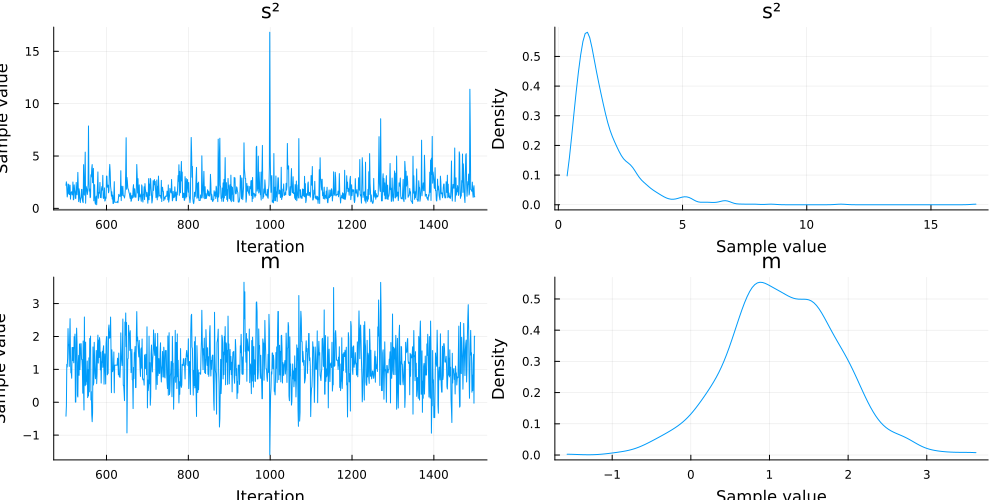

In [6]:
plot(chn)

In [12]:
@model function coin(data)
    # 事前分布
    p ~ Beta(1, 1)

    N = length(data) 
    for n = 1 : N 
        data[n] ~ Bernoulli(p)
    end
end

coin (generic function with 2 methods)

In [14]:
# data
_p = 0.65
true_coin_dist = Bernoulli(_p)
trial = 100 
data = rand(true_coin_dist, trial)

println(sum(data))

68


┌ Info: Found initial step size
└   ϵ = 0.8


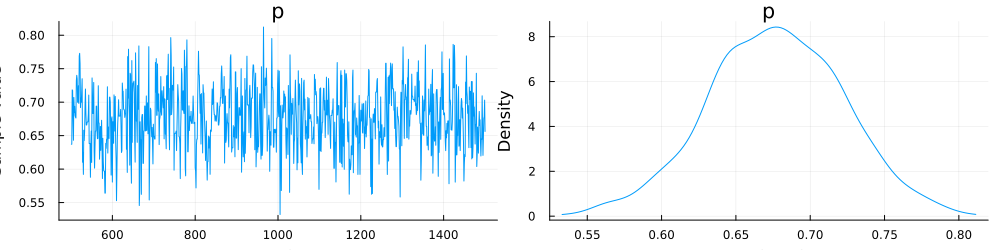

In [16]:
chain = sample(coin(data), NUTS(), 1000)

plot(chain)